## Medical Appointment No Shows

#### Link to dataset: https://www.kaggle.com/joniarroba/noshowappointments

### Introduction

- Many times people do not show up for a medical appointment. Previous studies have shown that about 25% of the people did not show up.
- No-show is a loss for doctors since they lose their payments. On the other hand, patients who wanted an appointment as soon as possible were unable to get one.
- Thus, there are two losses: the financial loss for the doctor and the loss of an appointment for the person in need.
- The paper could help clinics and hospitals in understanding what attributes are associated with the individuals who did not show up.

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Data description

- <strong>PatientId</strong>: Identification of a patient
- <strong>AppointmentID</strong>: Identification of each appointment
- <strong>Gender</strong>: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
- <strong>ScheduledDay</strong>: The day the patient booked the appointment, this is before or at the same day of AppointmentDay of course.
- <strong>AppointmentDay</strong>: The day day the the apponitment is booked for
- <strong>Age</strong>: How old is the patient.
- <strong>Neighbourhood</strong>: Where the appointment takes place.
- <strong>Scholarship</strong>: True of False (A government financial aid to poor Brazilian families) https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
- <strong>Hypertension</strong>: True or False (High blood pressure)
- <strong>Diabetes</strong>: True or False
- <strong>Alcoholism</strong>: True or False
- <strong>Handcap</strong>: 0-4 (the handcap refers to the number of disabilites a person has. For example, if the person is blind and can't walk the total is 2)
- <strong>SMS_received</strong>: 1 or more messages sent to the patient.
- <strong>No-show</strong>: True or False.

### Loading Python libraries

In [2]:
#Python Numpy and Pandas
import numpy as np
import pandas as pd

#Python Seaborn
import seaborn as sns

#Python Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Plotly
import plotly.express as px

#Graphviz
from sklearn import tree
from sklearn.tree import export_graphviz
from graphviz import Source

#Python Widgets
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display

#Maximum rows to display
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

###  Loading Dataset

In [3]:
df = pd.read_csv("../input/medical-appointment-no-shows.csv", converters={"PatientId":str})
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

##  <span style="color:blue">**Data Cleaning** </span>

#### Renaming Columns

In [5]:
df.columns=['PatientId', 'AppointmentId', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SmsReceived', 'NoShow']

In [6]:
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


####  Check for Null values in the dataset

In [7]:
df.isna().sum()

PatientId         0
AppointmentId     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SmsReceived       0
NoShow            0
dtype: int64

####  <span style="color:green">**As we see, there are no Null values in our dataset** </span>

#### Extracting date from Scheduled Day

In [8]:
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"]) # COnverting Date from String type to Datetime format
df['ScheduledDate'] = df['ScheduledDay'].dt.date 
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow,ScheduledDate
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29


#### Extracting date from Appointment Day

In [9]:
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"]) ##COnverting Date from String type to Datetime format
df['AppointmentDate'] = df['AppointmentDay'].dt.date
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow,ScheduledDate,AppointmentDate
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29


#### Checking whether any Appointment days are before Scheduled days

In [10]:
len(df[df["AppointmentDay"] < df["ScheduledDay"]])

38568

####  <span style="color:green">**'AppointmentDay' has no value for time of the day and it has many values(38568) smaller than 'ScheduledDay' which is not possible !** </span>

####  <span style="color:green">**The reason for this problem is that probably these appointments happened at the same day that they're booked but because we don't have the exact hour for 'AppointmentDay' their difference is negative.** </span>

####  <span style="color:green">**To solve this problem, we added 23 hrs and 59 min and 59 secs to the 'AppointmentDay'. Now all 'AppointmentDay' are still at the same the same day but we only have 5 negative values for:** </span>
####  <span>**df["AppointmentDay"] - df["ScheduledDay"]** </span>

In [11]:
df['AppointmentDay'] = df['AppointmentDay'] + pd.Timedelta('1d') - pd.Timedelta('1s')
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow,ScheduledDate,AppointmentDate
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 23:59:59+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 23:59:59+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 23:59:59+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29


In [12]:
len(df[ df.AppointmentDay < df.ScheduledDay ])

5

####  <span style="color:green">**Now we have only 5 rows where ScheduledDay is later than AppointmentDay which can be dropped** </span>

In [13]:
df.drop( df[df.AppointmentDay <= df.ScheduledDay].index, inplace=True)
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow,ScheduledDate,AppointmentDate
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 23:59:59+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 23:59:59+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 23:59:59+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29


#### Extracting day name from Scheduled day

In [14]:
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow,ScheduledDate,AppointmentDate
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 23:59:59+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 23:59:59+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 23:59:59+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29


In [15]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['ScheduledDayOfWeek']=df['ScheduledDay'].dt.date
df['ScheduledDayOfWeek']=pd.to_datetime(df['ScheduledDayOfWeek'])
df['ScheduledDayOfWeek'] = df['ScheduledDayOfWeek'].dt.day_name()
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow,ScheduledDate,AppointmentDate,ScheduledDayOfWeek
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 23:59:59+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 23:59:59+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,Friday
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 23:59:59+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,Friday
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,Friday


#### Extracting day name from Appointment day

In [16]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['AppointmentDayOfWeek']=df['AppointmentDay'].dt.date
df['AppointmentDayOfWeek']=pd.to_datetime(df['AppointmentDayOfWeek'])
df['AppointmentDayOfWeek'] = df['AppointmentDayOfWeek'].dt.day_name()
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow,ScheduledDate,AppointmentDate,ScheduledDayOfWeek,AppointmentDayOfWeek
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 23:59:59+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,Friday,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,Friday,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 23:59:59+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,Friday,Friday
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 23:59:59+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,Friday,Friday
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,Friday,Friday


#### Converting Categorical values to Numeric values

In [17]:
d_replace = {"Yes": 1, "No": 0}
df = df.replace({"NoShow": d_replace})

#### Adding "Lead days" column

In [18]:
df['LeadDays']=(df["AppointmentDay"] - df["ScheduledDay"]).astype('timedelta64[D]').astype(int)

In [19]:
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow,ScheduledDate,AppointmentDate,ScheduledDayOfWeek,AppointmentDayOfWeek,LeadDays
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 23:59:59+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,2016-04-29,Friday,Friday,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,Friday,Friday,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 23:59:59+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,Friday,Friday,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 23:59:59+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,2016-04-29,Friday,Friday,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,2016-04-29,Friday,Friday,0


##  <span style="color:blue">**What are the major factors contributing to No Shows of patients ?** </span>

#### Interactive plots to compare number of No Shows in relation with various factors

In [20]:
df_for_plots=df.copy()

#### Now, we classify age of the Patients into 5 categories

In [21]:
def age_category(age):
    if(age<=15):
        return 1
    elif(age>15 and age<=30):
        return 2
    elif(age>30 and age<=45):
        return 3
    elif(age>45 and age<=60):
        return 4
    elif(age>60):
        return 5

df_for_plots['AgeCategory'] = df_for_plots.apply(lambda x: age_category(x['Age']), axis=1)

#### We classify Lead Days into 6 categories

In [22]:
def lead_day_category(LeadDay):
    if(LeadDay<=2):
        return 'Within 2 Days'
    elif(LeadDay>2 and LeadDay<=7):
        return 'Within 1 Week'
    elif(LeadDay>7 and LeadDay<=14):
        return 'Within 2 Weeks'
    elif(LeadDay>14 and LeadDay<=21):
        return 'Within 3 Weeks'
    elif(LeadDay>21 and LeadDay<=28):
        return 'Within 4 Weeks'
    elif(LeadDay>28):
        return 'After 1 Month'


#### Creating a dataframe to calculate the percentage of people who miss their appointments, grouped by lead day category

In [23]:
df_for_plots['LeadDayCategory'] = df_for_plots.apply(lambda x: lead_day_category(x['LeadDays']), axis=1)

df_lead_days = df_for_plots.groupby(by=['LeadDayCategory', 'NoShow'])['PatientId'].agg(['count']).rename(columns={'count':'LeadDayCount'})
df_lead_days.reset_index(inplace=True)
df_lead_days = df_lead_days[df_lead_days['NoShow']==1]

df_total = df_for_plots[['LeadDayCategory', 'PatientId']]
df_total = df_total.groupby(by='LeadDayCategory')['PatientId'].agg(['count']).rename(columns={'count':'Total'})
df_total.reset_index(inplace=True)

df_lead_days = df_lead_days.merge(df_total, how='left', left_on=['LeadDayCategory'], right_on=['LeadDayCategory'])

df_lead_days['Percent'] = round((df_lead_days['LeadDayCount']*100) / df_lead_days['Total'], 2)
df_lead_days

,LeadDayCategory,NoShow,LeadDayCount,Total,Percent
0,After 1 Month,1,3968,12171,32.60
1,Within 1 Week,1,5057,20247,24.98
2,Within 2 Days,1,4507,50501,8.92
3,Within 2 Weeks,1,3664,12025,30.47
4,Within 3 Weeks,1,2861,8874,32.24
5,Within 4 Weeks,1,2257,6704,33.67


#### We subsitute the numerical values in column 'SmsReceived' to categorical values

In [24]:
df_for_plots['SmsReceived'] = df_for_plots['SmsReceived'].map({0:'SMS not received', 1:'SMS received'})

#### We consider 'Hypertension' and 'Diabetes' as Chronic illness and we classify Patients into 2 categories:
- Patients belonging to Age Category 5 and suffering from Chronic illness
- Patients belonging to Age Category 1-4 and suffering from Chronic illness

In [25]:
df_for_plots.loc[((df_for_plots['Hypertension'] == 1) | (df_for_plots['Diabetes'] == 1)) & (df_for_plots['AgeCategory']==5), 'Old_Chronic'] = 'OldChronic'
df_for_plots.loc[((df_for_plots['Hypertension'] == 1) | (df_for_plots['Diabetes'] == 1)) & (df_for_plots['AgeCategory']!=5), 'Old_Chronic'] = 'YoungChronic'

df_for_plots['Old_Chronic'] = df_for_plots['Old_Chronic'].fillna('Healthier')

df_for_plots.head()

Pct_Old_Chronic = round((df_for_plots[(df_for_plots['Old_Chronic']=='OldChronic') & (df_for_plots['NoShow']==1)]['PatientId'].count() \
/ df_for_plots[df_for_plots['NoShow']==1]['PatientId'].count()) * 100, 2)

Pct_Young_Chronic = round((df_for_plots[(df_for_plots['Old_Chronic']=='YoungChronic') & (df_for_plots['NoShow']==1)]['PatientId'].count() \
/ df_for_plots[df_for_plots['NoShow']==1]['PatientId'].count()) * 100, 2)

print("Patients belonging to Age Category 5 and suffering from Chronic illness: "+str(Pct_Old_Chronic))
print("Patients belonging to Age Category 1-4 and suffering from Chronic illness: "+str(Pct_Young_Chronic))

Patients belonging to Age Category 5 and suffering from Chronic illness: 8.2
Patients belonging to Age Category 1-4 and suffering from Chronic illness: 10.0


### We make use of Python Widgets to consolidate all our Plots in one cell and give freedom to the user to select whichever Plot he wants to see.

In [26]:
size=15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)


@widgets.interact_manual(Plot_Name=['-- Select a Plot --','No Shows as per Age Category of Patients', 
                                'No Shows as per Neighbourhood',
                                'No Shows as per Appointment Day',
                                'No Shows as per number of Disabilities',
                                'Effect of an SMS notification on No Shows',
                                'Distribution of No Shows as per Number of Disabilities and Age Category',
                                'Distribution of No Shows as per Number of Chronic Illness',
                                'Effect of Waiting time on No Show'])

def plot(Plot_Name):
    if Plot_Name=='No Shows as per Neighbourhood':
        df_for_plots["All"]="Brazil"
        fig = px.treemap(data_frame=df_for_plots,path=['All','Neighbourhood','Gender'],
                         values='NoShow',title='No Shows as per Neighbourhood')
        fig.show()
        
    elif Plot_Name=='Distribution of No Shows as per Number of Disabilities and Age Category':
        sns.catplot(x='AgeCategory', y='NoShow', hue='Handicap', data=df_for_plots, kind='bar',aspect=3)
        plt.title("Distribution of No Shows as per Number of Disabilities and Age Category")
        
    elif Plot_Name=='No Shows as per Age Category of Patients':
        fig, ax = plt.subplots(1, 1, figsize=(16, 9))
        sns.barplot(x=df_for_plots['AgeCategory'],y=df_for_plots['NoShow'],hue=df_for_plots['Gender'],palette='Blues')
        plt.title("No Shows as per Age Category of Patients")
        
    elif Plot_Name=='No Shows as per Appointment Day':
        fig, ax = plt.subplots(1, 1, figsize=(16, 9))
        sns.barplot(x=df_for_plots['AppointmentDayOfWeek'],y=df_for_plots['NoShow']*100,palette='ocean')
        plt.title("No Shows as per Appointment Day")
        
    elif Plot_Name=='No Shows as per number of Disabilities':
        fig, ax = plt.subplots(1, 1, figsize=(16, 9))
        sns.barplot(x=df_for_plots['Handicap'],y=df_for_plots['NoShow']*100,palette='ocean')   
        plt.xlabel("No. of Disabilities")
        plt.ylabel("% of NoShow")
        plt.title("No Shows as per number of Disabilities")
        
    elif Plot_Name=='Distribution of No Shows as per Number of Chronic Illness':
        x = [8.19,10.0]
        years = ['Senior Citizen with Chronic Illness', 'Young with Chronic Illness']
        plt.figure(figsize=(16,9))
        plt.bar(years, x,color='Purple')
        plt.ylabel("% of NoShow")
        plt.title("Distribution of No Shows as per Number of Chronic Illness")
        plt.show()
        
    elif Plot_Name=='Effect of an SMS notification on No Shows':
        fig, ax = plt.subplots(1, 1, figsize=(16, 9))
        sns.barplot(x=df_for_plots['NoShow']*100,y=df_for_plots['SmsReceived'],palette='pastel',orient='h') 
        plt.xlabel("% of NoShow")
        plt.title("Effect of an SMS notification on No Shows")
        plt.ylabel('SMS Notification')
        
    elif Plot_Name=='Effect of Waiting time on No Show':
        sns.lineplot(x=df_lead_days['LeadDayCategory'],y=df_lead_days['Percent'])
        plt.title("Effect of Waiting time on No Show")
        plt.xlabel('Lead Day Category')
        plt.ylabel('% No Show')
    else:
        print()

interactive(children=(Dropdown(description='Plot_Name', options=('-- Select a Plot --', 'No Shows as per Age C…

## <span style="color:green"> Conclusion: </span>
#### - Patients with Age category 2 are more likely to miss their appointments
#### - In all of the top 10 Neighbourhoods with highest No-Shows, the proportion of females not showing up is more than males.
#### - Patients are most likely to show up if the day of their appointment is Saturday.
#### - Patients having Number of disabilities as 4 are are the one's with highest no-shows.
#### - Patients receiving an SMS Notification are more likely to not show-up for an appointment as compared to the one's not receiving an SMS notification. Hospitals needs to further assess their strategy about notifying patients for their appointments.
#### - Patients belonging to Age category 1 and having Number of disabilities as 3 and 4 are more likely to not show up.
#### - Younger patients (with age category between 1-4) suffering from Chronic illness(Diabetes and Hypertension) constitute a higher proportion of no-shows as compared to senior citizens (with age category 5) suffering from chronic illness.

# <span style="color:blue">**Machine Leaning**</span>


##  <span style="color:blue">**Decision Tree** </span>

#### Let's make a Decision Tree based on only the original columns

In [27]:
df_for_decision_tree=df.copy()

In [28]:
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow,ScheduledDate,AppointmentDate,ScheduledDayOfWeek,AppointmentDayOfWeek,LeadDays
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 23:59:59+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,2016-04-29,Friday,Friday,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,Friday,Friday,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 23:59:59+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,Friday,Friday,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 23:59:59+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,2016-04-29,Friday,Friday,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,2016-04-29,Friday,Friday,0


#### We extract the Original columns from modified dataset to check the accuracy of Decision Tree algorithm

In [29]:
df_for_decision_tree = df[['NoShow', 'Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SmsReceived', 'ScheduledDayOfWeek',\
        'ScheduledDay','AppointmentDay','AppointmentDayOfWeek']]

In [30]:
df_for_decision_tree['ScheduledDay']=df_for_decision_tree['ScheduledDay'].dt.day
df_for_decision_tree['AppointmentDay']=df_for_decision_tree['AppointmentDay'].dt.day

In [31]:
df_for_decision_tree.head()

,NoShow,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,ScheduledDayOfWeek,ScheduledDay,AppointmentDay,AppointmentDayOfWeek
0,0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,Friday,29,29,Friday
1,0,M,56,JARDIM DA PENHA,0,0,0,0,0,0,Friday,29,29,Friday
2,0,F,62,MATA DA PRAIA,0,0,0,0,0,0,Friday,29,29,Friday
3,0,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Friday,29,29,Friday
4,0,F,56,JARDIM DA PENHA,0,1,1,0,0,0,Friday,29,29,Friday


#### We convert categorical values to dummies

In [32]:
df_for_decision_tree = pd.get_dummies(df_for_decision_tree, columns=['Neighbourhood','AppointmentDayOfWeek','ScheduledDayOfWeek','Gender'])


In [33]:
df_for_decision_tree.shape

(110522, 105)

In [34]:
pip install pydotplus

     |████████████████████████████████| 278 kB 2.8 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=7981f54b48290de6507f056decfbb4ac4f32e397065a33a8c3aef900506e9d52
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [35]:
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
from IPython.display import SVG
from graphviz import Source
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
X = df_for_decision_tree.drop('NoShow',axis=1)
Y = df_for_decision_tree['NoShow']
dt = tree.DecisionTreeClassifier(max_depth=2).fit(X,Y)

In [37]:
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]

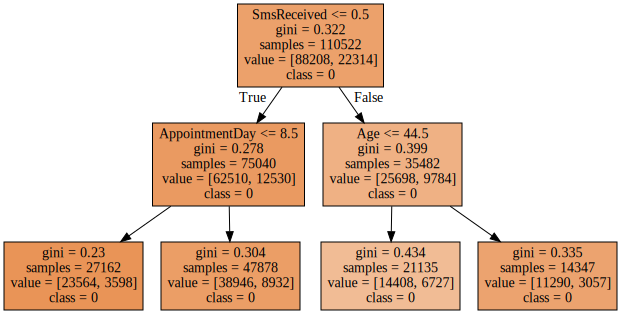

In [38]:
graph = Source(tree.export_graphviz(dt, out_file=None
  , feature_names=dt_feature_names, class_names=dt_target_names
  , filled = True))
display(SVG(graph.pipe(format='svg')))

#### The decision tree classifier classifies the data points into the same category, although our dataset isn't skewed. Hence moving onto the next model

### Random Forest Classifier on the original columns

In [39]:
df_for_random_forest = df[['NoShow', 'Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension','Diabetes', \
                           'Alcoholism', 'Handicap', 'SmsReceived', 'ScheduledDayOfWeek','ScheduledDay',\
                           'AppointmentDay','AppointmentDayOfWeek']]

In [40]:
df_for_random_forest = pd.get_dummies(df_for_random_forest,columns=['Neighbourhood', 'AppointmentDayOfWeek'])
df_for_random_forest.head()

,NoShow,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,ScheduledDayOfWeek,ScheduledDay,AppointmentDay,Neighbourhood_AEROPORTO,Neighbourhood_ANDORINHAS,Neighbourhood_ANTÔNIO HONÓRIO,Neighbourhood_ARIOVALDO FAVALESSA,Neighbourhood_BARRO VERMELHO,Neighbourhood_BELA VISTA,Neighbourhood_BENTO FERREIRA,Neighbourhood_BOA VISTA,Neighbourhood_BONFIM,Neighbourhood_CARATOÍRA,Neighbourhood_CENTRO,Neighbourhood_COMDUSA,Neighbourhood_CONQUISTA,Neighbourhood_CONSOLAÇÃO,Neighbourhood_CRUZAMENTO,Neighbourhood_DA PENHA,Neighbourhood_DE LOURDES,Neighbourhood_DO CABRAL,Neighbourhood_DO MOSCOSO,Neighbourhood_DO QUADRO,Neighbourhood_ENSEADA DO SUÁ,Neighbourhood_ESTRELINHA,Neighbourhood_FONTE GRANDE,Neighbourhood_FORTE SÃO JOÃO,Neighbourhood_FRADINHOS,Neighbourhood_GOIABEIRAS,Neighbourhood_GRANDE VITÓRIA,Neighbourhood_GURIGICA,Neighbourhood_HORTO,Neighbourhood_ILHA DAS CAIEIRAS,Neighbourhood_ILHA DE SANTA MARIA,Neighbourhood_ILHA DO BOI,Neighbourhood_ILHA DO FRADE,Neighbourhood_ILHA DO PRÍNCIPE,Neighbourhood_ILHAS OCEÂNICAS DE TRINDADE,Neighbourhood_INHANGUETÁ,Neighbourhood_ITARARÉ,Neighbourhood_JABOUR,Neighbourhood_JARDIM CAMBURI,Neighbourhood_JARDIM DA PENHA,Neighbourhood_JESUS DE NAZARETH,Neighbourhood_JOANA D´ARC,Neighbourhood_JUCUTUQUARA,Neighbourhood_MARIA ORTIZ,Neighbourhood_MARUÍPE,Neighbourhood_MATA DA PRAIA,Neighbourhood_MONTE BELO,Neighbourhood_MORADA DE CAMBURI,Neighbourhood_MÁRIO CYPRESTE,Neighbourhood_NAZARETH,Neighbourhood_NOVA PALESTINA,Neighbourhood_PARQUE INDUSTRIAL,Neighbourhood_PARQUE MOSCOSO,Neighbourhood_PIEDADE,Neighbourhood_PONTAL DE CAMBURI,Neighbourhood_PRAIA DO CANTO,Neighbourhood_PRAIA DO SUÁ,Neighbourhood_REDENÇÃO,Neighbourhood_REPÚBLICA,Neighbourhood_RESISTÊNCIA,Neighbourhood_ROMÃO,Neighbourhood_SANTA CECÍLIA,Neighbourhood_SANTA CLARA,Neighbourhood_SANTA HELENA,Neighbourhood_SANTA LUÍZA,Neighbourhood_SANTA LÚCIA,Neighbourhood_SANTA MARTHA,Neighbourhood_SANTA TEREZA,Neighbourhood_SANTO ANDRÉ,Neighbourhood_SANTO ANTÔNIO,Neighbourhood_SANTOS DUMONT,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,AppointmentDayOfWeek_Friday,AppointmentDayOfWeek_Monday,AppointmentDayOfWeek_Saturday,AppointmentDayOfWeek_Thursday,AppointmentDayOfWeek_Tuesday,AppointmentDayOfWeek_Wednesday
0,0,F,62,0,1,0,0,0,0,Friday,2016-04-29 18:38:08+00:00,2016-04-29 23:59:59+00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,M,56,0,0,0,0,0,0,Friday,2016-04-29 16:08:27+00:00,2016-04-29 23:59:59+00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,F,62,0,0,0,0,0,0,Friday,2016-04-29 16:19:04+00:00,2016-04-29 23:59:59+00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,F,8,0,0,0,0,0,0,Friday,2016-04-29 17:29:31+00:00,2016-04-29 23:59:59+00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,F,56,0,1,1,0,0,0,Friday,2016-04-29 16:07:23+00:00,2016-04-29 23:59:59+00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Converting categorical values of the Gender and ScheduledDayOfWeek into numeric values

In [41]:
df_for_random_forest['Gender'] = df_for_random_forest['Gender'].map({'M':1, 'F':0})
df_for_random_forest['ScheduledDayOfWeek'] = df_for_random_forest['ScheduledDayOfWeek'].map({'Monday':0, 'Tuesday':1,\
                                                                                             'Wednesday':2, 'Thursday':3,\
                                                                                             'Friday':4, 'Saturday':5})

As we have already extracted the date values from the ScheduledDay and AppointmentDay columns, dropping them as we do not need the timestamp. 

In [42]:
df_for_random_forest.drop(['ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

In [43]:
target = 'NoShow'
predictors = df_for_random_forest.columns[1:]

In [44]:
from sklearn.model_selection import train_test_split

X = df_for_random_forest[predictors]
Y = df_for_random_forest[target]

X_train, X_test, Y_train, Y_test= \
train_test_split(X,Y,test_size=0.3,random_state = 5)

In [45]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as met

clf_rf = RandomForestClassifier(random_state = 5, n_estimators=100)
clf_rf.fit(X_train,Y_train)


y_pred_rf = clf_rf.predict(X_test)
y_pred_proba_rf = clf_rf.predict_proba(X_test)[:,1]

Accuracy-

In [46]:
round(met.accuracy_score(Y_test, y_pred_rf), 4)

0.7618

AUC Score-

In [47]:
round(met.roc_auc_score(Y_test, y_pred_proba_rf), 4)

0.6615

# **AutoML Result**

Now we want to try auto ml H2o:

First, we need to add the dataset into the h2o driverless app,

then split the data into train and test,

then set the accuracey, time and interpretability as you can see in the screenshot below

and finaly, we run the model.

After the calculation is done, you can see that the best model is LightGBM and AUC is 0.7403

In [48]:
Image(url= "https://i.ibb.co/6P1Wj26/H2-O-Appointment.png")

## H2o gives the AUC of 0.7403
We want to make a more accurate model

We're going to create a model to produce better AUC:

First we try creating new columns(feature engineering)<br>
Then we try different models to get the best AUC possibel(hyper parameter tuning)

##  <span style="color:blue">**Feature Engineering** </span>

#### Added following new columns to extract more information from our dataset

- <strong>Prior No-Show Rate:</strong> No-shows as a percentage of total appointments (hypothesis: some patients persistently miss their appointments)
- <strong>Status of the last appointment:</strong> (hypothesis: if you miss your last appointment, you are more likely to attend the next one)
- <strong>Number of previous appointments</strong> (hypothesis: patients with persistent conditions are more likely to attend)
- <strong>Days since last appointment: </strong> Difference in days between the last 2 appointments

Note-<br>
The following cell takes a while to run

In [49]:
%%time

df = df.sort_values(["PatientId","AppointmentDate"])
l_no_show_rates = []
l_last_shows = []
l_appts_counts = []
l_appts_lasts = []

for pat in df["PatientId"].unique():
    dfx = df[df["PatientId"] == pat]
    l_no_show = list(dfx["NoShow"])
    
    l_no_show_rate = [0]
    l_appts_last = [0]
    for i in range(1,len(dfx)):
        # no show rates
        rate_so_far = round((np.sum(l_no_show[0:i]) / i)*100,1)
        l_no_show_rate.append(rate_so_far)
        # appointments since last appointment
        dates_list = list(dfx["AppointmentDate"])
        l_appt_diff = (dates_list[i] - dates_list[i-1]).days
        l_appts_last.append(l_appt_diff)
        
    # appointment count
    l_appts_count = []
    for i in range(0,len(dfx)):
        l_appts = i+1
        l_appts_count.append(l_appts)
        
    l_no_show_rates.extend(l_no_show_rate)
    l_appts_counts.extend(l_appts_count)
    l_appts_lasts.extend(l_appts_last)
    
    # last show
    l_last_show = []
    l_last_show = [0] + l_no_show[:-1]
    l_last_shows.extend(l_last_show)   

df["NoShowRate"] = l_no_show_rates
df["LastShowStatus"] = l_last_shows
df["AppointmentCount"] = l_appts_counts
df["LastAppointmentDays"] = l_appts_lasts

df.head()

CPU times: user 22min 7s, sys: 246 ms, total: 22min 7s
Wall time: 22min 8s


,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow,ScheduledDate,AppointmentDate,ScheduledDayOfWeek,AppointmentDayOfWeek,LeadDays,NoShowRate,LastShowStatus,AppointmentCount,LastAppointmentDays
84473,11111462625267,5715720,F,2016-05-18 14:58:29+00:00,2016-06-08 23:59:59+00:00,65,REPÚBLICA,0,1,0,0,0,1,0,2016-05-18,2016-06-08,Wednesday,Wednesday,21,0.0,0,1,0
51059,111124532532143,5531224,M,2016-03-31 09:17:26+00:00,2016-05-03 23:59:59+00:00,9,MARIA ORTIZ,0,0,0,0,0,1,0,2016-03-31,2016-05-03,Thursday,Tuesday,33,0.0,0,1,0
95359,111124532532143,5624030,M,2016-04-26 15:05:58+00:00,2016-06-01 23:59:59+00:00,9,MARIA ORTIZ,0,0,0,0,0,1,1,2016-04-26,2016-06-01,Tuesday,Wednesday,36,0.0,0,2,29
60744,11114485119737,5621757,F,2016-04-26 10:46:38+00:00,2016-05-25 23:59:59+00:00,12,MARIA ORTIZ,0,0,0,0,0,1,1,2016-04-26,2016-05-25,Tuesday,Wednesday,29,0.0,0,1,0
2321,11116239871275,5625265,F,2016-04-27 07:05:38+00:00,2016-04-29 23:59:59+00:00,13,SÃO PEDRO,0,0,0,0,0,0,0,2016-04-27,2016-04-29,Wednesday,Friday,2,0.0,0,1,0


In [50]:
df.to_csv("after_preprocessing.csv")

In [51]:
df['ScheduledDayDay'] = df['ScheduledDay'].dt.day
df['AppointmentDayDay'] = df['AppointmentDay'].dt.day

Now we create a new dataframe with these new columns

In [52]:
df_ml = df[['NoShow', 'Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension','Diabetes', 'Alcoholism', \
            'Handicap', 'SmsReceived','LeadDays', 'ScheduledDayOfWeek','ScheduledDayDay','AppointmentDayDay',\
            'AppointmentDayOfWeek','NoShowRate','LastShowStatus', 'AppointmentCount', 'LastAppointmentDays']]

In [53]:
df_ml.head()

,NoShow,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,LeadDays,ScheduledDayOfWeek,ScheduledDayDay,AppointmentDayDay,AppointmentDayOfWeek,NoShowRate,LastShowStatus,AppointmentCount,LastAppointmentDays
84473,0,F,65,REPÚBLICA,0,1,0,0,0,1,21,Wednesday,18,8,Wednesday,0.0,0,1,0
51059,0,M,9,MARIA ORTIZ,0,0,0,0,0,1,33,Thursday,31,3,Tuesday,0.0,0,1,0
95359,1,M,9,MARIA ORTIZ,0,0,0,0,0,1,36,Tuesday,26,1,Wednesday,0.0,0,2,29
60744,1,F,12,MARIA ORTIZ,0,0,0,0,0,1,29,Tuesday,26,25,Wednesday,0.0,0,1,0
2321,0,F,13,SÃO PEDRO,0,0,0,0,0,0,2,Wednesday,27,29,Friday,0.0,0,1,0


Converting categorical values of the Gender, AppointmentDayOfWeek and ScheduledDayOfWeek into numeric values

In [54]:
df_ml['Gender'] = df_ml['Gender'].map({'M':1, 'F':0})
df_ml['ScheduledDayOfWeek'] = df_ml['ScheduledDayOfWeek'].map({'Monday':0, 'Tuesday':1, 'Wednesday':2, \
                                                               'Thursday':3, 'Friday':4, 'Saturday':5})
df_ml['AppointmentDayOfWeek'] = df_ml['AppointmentDayOfWeek'].map({'Monday':0, 'Tuesday':1, 'Wednesday':2, \
                                                               'Thursday':3, 'Friday':4, 'Saturday':5})

In [55]:
df_ml = pd.get_dummies(df_ml,columns=['Neighbourhood'])
df_ml

,NoShow,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,LeadDays,ScheduledDayOfWeek,ScheduledDayDay,AppointmentDayDay,AppointmentDayOfWeek,NoShowRate,LastShowStatus,AppointmentCount,LastAppointmentDays,Neighbourhood_AEROPORTO,Neighbourhood_ANDORINHAS,Neighbourhood_ANTÔNIO HONÓRIO,Neighbourhood_ARIOVALDO FAVALESSA,Neighbourhood_BARRO VERMELHO,Neighbourhood_BELA VISTA,Neighbourhood_BENTO FERREIRA,Neighbourhood_BOA VISTA,Neighbourhood_BONFIM,Neighbourhood_CARATOÍRA,Neighbourhood_CENTRO,Neighbourhood_COMDUSA,Neighbourhood_CONQUISTA,Neighbourhood_CONSOLAÇÃO,Neighbourhood_CRUZAMENTO,Neighbourhood_DA PENHA,Neighbourhood_DE LOURDES,Neighbourhood_DO CABRAL,Neighbourhood_DO MOSCOSO,Neighbourhood_DO QUADRO,Neighbourhood_ENSEADA DO SUÁ,Neighbourhood_ESTRELINHA,Neighbourhood_FONTE GRANDE,Neighbourhood_FORTE SÃO JOÃO,Neighbourhood_FRADINHOS,Neighbourhood_GOIABEIRAS,Neighbourhood_GRANDE VITÓRIA,Neighbourhood_GURIGICA,Neighbourhood_HORTO,Neighbourhood_ILHA DAS CAIEIRAS,Neighbourhood_ILHA DE SANTA MARIA,Neighbourhood_ILHA DO BOI,Neighbourhood_ILHA DO FRADE,Neighbourhood_ILHA DO PRÍNCIPE,Neighbourhood_ILHAS OCEÂNICAS DE TRINDADE,Neighbourhood_INHANGUETÁ,Neighbourhood_ITARARÉ,Neighbourhood_JABOUR,Neighbourhood_JARDIM CAMBURI,Neighbourhood_JARDIM DA PENHA,Neighbourhood_JESUS DE NAZARETH,Neighbourhood_JOANA D´ARC,Neighbourhood_JUCUTUQUARA,Neighbourhood_MARIA ORTIZ,Neighbourhood_MARUÍPE,Neighbourhood_MATA DA PRAIA,Neighbourhood_MONTE BELO,Neighbourhood_MORADA DE CAMBURI,Neighbourhood_MÁRIO CYPRESTE,Neighbourhood_NAZARETH,Neighbourhood_NOVA PALESTINA,Neighbourhood_PARQUE INDUSTRIAL,Neighbourhood_PARQUE MOSCOSO,Neighbourhood_PIEDADE,Neighbourhood_PONTAL DE CAMBURI,Neighbourhood_PRAIA DO CANTO,Neighbourhood_PRAIA DO SUÁ,Neighbourhood_REDENÇÃO,Neighbourhood_REPÚBLICA,Neighbourhood_RESISTÊNCIA,Neighbourhood_ROMÃO,Neighbourhood_SANTA CECÍLIA,Neighbourhood_SANTA CLARA,Neighbourhood_SANTA HELENA,Neighbourhood_SANTA LUÍZA,Neighbourhood_SANTA LÚCIA,Neighbourhood_SANTA MARTHA,Neighbourhood_SANTA TEREZA,Neighbourhood_SANTO ANDRÉ,Neighbourhood_SANTO ANTÔNIO,Neighbourhood_SANTOS DUMONT,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
84473,0,0,65,0,1,0,0,0,1,21,2,18,8,2,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51059,0,1,9,0,0,0,0,0,1,33,3,31,3,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95359,1,1,9,0,0,0,0,0,1,36,1,26,1,2,0.0,0,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60744,1,0,12,0,0,0,0,0,1,29,1,26,25,2,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2321,0,0,13,0,0,0,0,0,0,2,2,27,29,4,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46976,0,0,8,1,0,0,0,0,1,35,2,20,25,2,100.0,1,2,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [56]:
df_ml.shape

(110522, 99)

In [57]:
target = 'NoShow'

In [58]:
predictors = df_ml.columns[1:]

### RandomForest Classifier

We run Random Forest Classifier on the new Data Set

In [59]:
from sklearn.model_selection import train_test_split

X = df_ml[predictors]
Y = df_ml[target]


X_train, X_test, Y_train, Y_test= \
train_test_split(X,Y,test_size=0.3,random_state = 0)

In [60]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state = 5, n_estimators=100)
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [61]:
y_pred = clf.predict(X_test)

In [62]:
y_pred_proba = clf.predict_proba(X_test)[:,1]

In [63]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met

confusion_matrix(Y_test,y_pred)

array([[25523,   856],
       [ 5697,  1081]])

Accuracy-

In [64]:
round(met.accuracy_score(Y_test, y_pred), 4)

0.8024

AUC Score-

In [65]:
round(met.roc_auc_score(Y_test, y_pred_proba), 4)

0.7441

In [66]:
l=[]
for feature in zip(predictors, clf.feature_importances_):
    l.append(feature)
    
df_importance = pd.DataFrame(l,columns=["Variable","Importance"])\
.sort_values("Importance", ascending=False)

df_importance

,Variable,Importance
1,Age,1.691654e-01
8,LeadDays,1.403033e-01
10,ScheduledDayDay,7.595050e-02
11,AppointmentDayDay,6.689942e-02
16,LastAppointmentDays,5.382999e-02
9,ScheduledDayOfWeek,4.527465e-02
12,AppointmentDayOfWeek,4.056236e-02
15,AppointmentCount,3.916821e-02
0,Gender,2.841735e-02
13,NoShowRate,1.892474e-02


### Printing the importance of each column

In [67]:
import matplotlib.pyplot as plt

In [68]:
plt.style.use('ggplot')

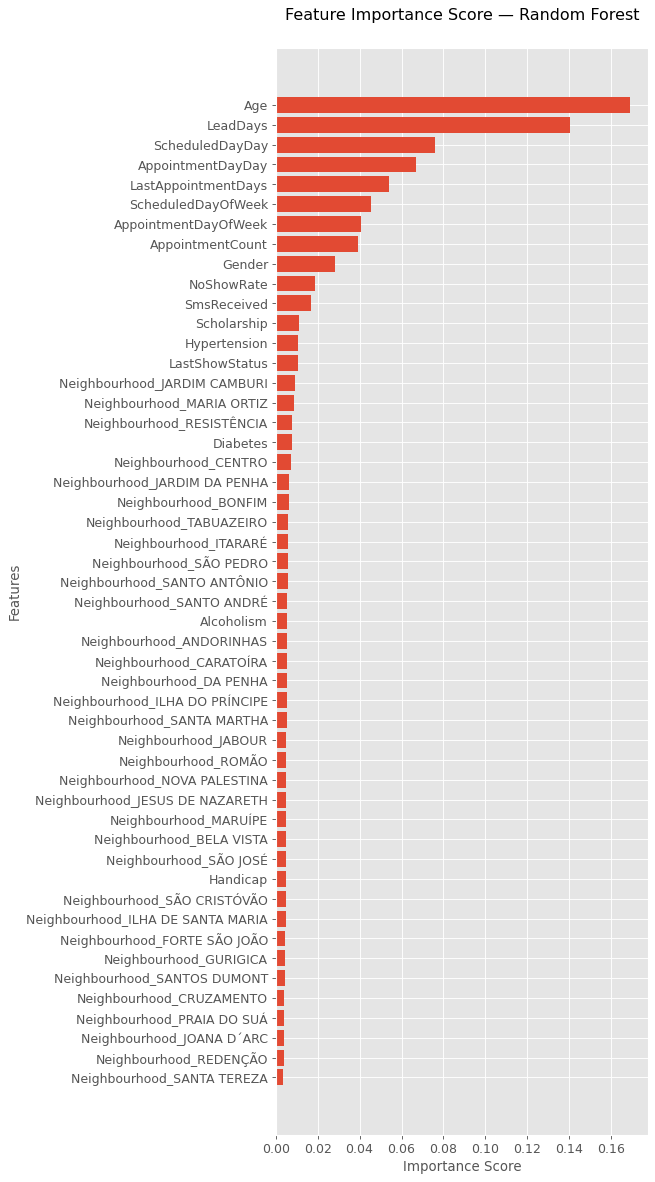

In [69]:
feature_importances = pd.DataFrame(clf.feature_importances_,
 index = predictors,
 columns=['importance']).sort_values('importance',
 ascending=False)
num = min([50,len(predictors)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]
plt.figure(num=None, figsize=(6, 18), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score — Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

### The plot above shows the importance of each column for our model
## <span style="color:blue">**Which classifier obtains the highest performance?**</span>
### H2o declared Light GBM as the best model, let's try it.
#  <span style="color:blue">**Light GBM Classifier** </span>
If you're working for the first time with Light GBM, you should first install it.

#### Light GBM doesn't work with non ASCII characters, so we need to drop these letters from column names. 

In [70]:
# Need to rename columns here, because Light GBM doesnt like non_ASCII column names
cols_l = df_ml.columns
cols_l_new = []
for col_name in cols_l:
    col_name_new = str(col_name).encode("ascii", "ignore").decode()
    cols_l_new.append(col_name_new)
    
df_ml.columns = cols_l_new
predictors = df_ml.columns[1:]

In [71]:
X = df_ml[predictors]
Y = df_ml[target]


X_train, X_test, Y_train, Y_test= \
train_test_split(X,Y,test_size=0.3,random_state = 0)

## <span style="color:blue">**Hyper Parameter Tuning**</span>
### We have tried many different combinations of parameters manualy to get the best result.
These parameters are the best!

In [72]:
import lightgbm

clf_lgbm = lightgbm.LGBMClassifier(
    n_estimators=500,
    n_jobs=-1,
    num_leaves = 51,
    objective = 'binary',
    learning_rate = 0.065,
    feature_fraction = 0.7,
    metric = 'auc'
)

Note-<br>
The next cell takes a while to run

In [73]:
%%time
clf_lgbm.fit(X_train, Y_train)


CPU times: user 11.4 s, sys: 138 ms, total: 11.6 s
Wall time: 3.04 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.7, importance_type='split',
               learning_rate=0.065, max_depth=-1, metric='auc',
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=51, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [74]:
y_pred_lgbm = clf_lgbm.predict(X_test)

In [75]:
y_pred_proba_lgbm = clf_lgbm.predict_proba(X_test)[:,1]

Accuracy-

In [76]:
round(met.accuracy_score(Y_test, y_pred_lgbm), 4)

0.8094

AUC Score-

In [77]:
round(met.roc_auc_score(Y_test, y_pred_proba_lgbm), 4)

0.7609

Light GBM is a super fast and accurate model, Let's compare it with a highly tuned XGBoost model!

#  <span style="color:blue">**XGBoost Classifier** </span>

### XGBoost is one the most powerful models

If you're working for the first time with XGBoost, you should first instal it.

pip install xgboost

In [78]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [79]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy as sp 
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, STATUS_RUNNING
from functools import partial
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

## <span style="color:blue">**Hyper Parameter Tuning**</span>

### We're going to find the best parameter for XGBoost 

Note-<br>
The next cell takes a while to run

In [80]:
%%time
from sklearn.model_selection import StratifiedKFold

def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'gamma': "{:.3f}".format(params['gamma']),
        'reg_alpha': "{:.3f}".format(params['reg_alpha']),
        'learning_rate': "{:.3f}".format(params['learning_rate']),
        'gamma': "{:.3f}".format(params['gamma']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = XGBClassifier(
        n_estimators=100,
        n_jobs=-1,
        **params
    )

    score = cross_val_score(clf, X_train, Y_train, scoring='accuracy', cv=StratifiedKFold()).mean()
    print("Accuracy {:.8f} params {}".format(-score, params))
    return -score

space = {
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    'reg_alpha':  hp.uniform('reg_alpha', 0.01, 0.4),
    'reg_lambda': hp.uniform('reg_lambda', 0.7, 1.0),
    'learning_rate': hp.uniform('learning_rate', 0.05, 0.2),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'gamma': hp.uniform('gamma', 0.0, 0.5),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)


Accuracy -0.80741938 params {'max_depth': 4, 'gamma': '0.062', 'reg_alpha': '0.215', 'learning_rate': '0.081', 'colsample_bytree': '0.490'}
Accuracy -0.80597169 params {'max_depth': 2, 'gamma': '0.076', 'reg_alpha': '0.313', 'learning_rate': '0.084', 'colsample_bytree': '0.528'}
Accuracy -0.80810444 params {'max_depth': 5, 'gamma': '0.340', 'reg_alpha': '0.313', 'learning_rate': '0.116', 'colsample_bytree': '0.349'}
Accuracy -0.80560977 params {'max_depth': 2, 'gamma': '0.467', 'reg_alpha': '0.187', 'learning_rate': '0.147', 'colsample_bytree': '0.681'}
Accuracy -0.80829833 params {'max_depth': 8, 'gamma': '0.112', 'reg_alpha': '0.022', 'learning_rate': '0.120', 'colsample_bytree': '1.000'}
Accuracy -0.80772959 params {'max_depth': 3, 'gamma': '0.120', 'reg_alpha': '0.130', 'learning_rate': '0.192', 'colsample_bytree': '0.821'}
Accuracy -0.80853099 params {'max_depth': 6, 'gamma': '0.008', 'reg_alpha': '0.258', 'learning_rate': '0.177', 'colsample_bytree': '0.644'}
Accuracy -0.80590706

In [81]:
best['max_depth'] = int(best['max_depth'])

print("BEST PARAMS: ", best)

BEST PARAMS:  {'colsample_bytree': 0.7261873262077718, 'gamma': 0.3281358263269441, 'learning_rate': 0.08807305921408945, 'max_depth': 8, 'reg_alpha': 0.15468018968513403, 'reg_lambda': 0.9432992526356866}


In [82]:
clf_xgb = XGBClassifier(
        n_estimators=600,
        n_jobs=-1,
        **best
    )

Note-<br>
The next cell takes a while to run

In [83]:
%%time

clf_xgb.fit(X_train, Y_train)

CPU times: user 4min 5s, sys: 142 ms, total: 4min 5s
Wall time: 4min 5s


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7261873262077718,
              gamma=0.3281358263269441, gpu_id=-1, importance_type='gain',
              interaction_constraints=None, learning_rate=0.08807305921408945,
              max_delta_step=0, max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=600, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0.15468018968513403, reg_lambda=0.9432992526356866,
              scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [84]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score

y_pred_xgb = clf_xgb.predict(X_test)
y_pred_proba_xgb = clf_xgb.predict_proba(X_test)[:,1]

Accuracy-

In [85]:
round(met.accuracy_score(Y_test, y_pred_xgb), 4)

0.8061

AUC Score-

In [86]:
round(met.roc_auc_score(Y_test, y_pred_proba_xgb), 4)

0.7582

XGBoost is a very powerful model

# <span>**Conclusion:** </span>
## <span>*Light GBM Classifier** </span> <span>**is the most accurate model.** </span>


### <span>*Accuracy: 0.809* </span>
### <span>*AUC: 0.761* </span>

### Plot ROC curve

In [87]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import sklearn as sk
import seaborn as sns  
from sklearn.datasets import make_classification  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import roc_curve

In [88]:
plt.style.use('dark_background')

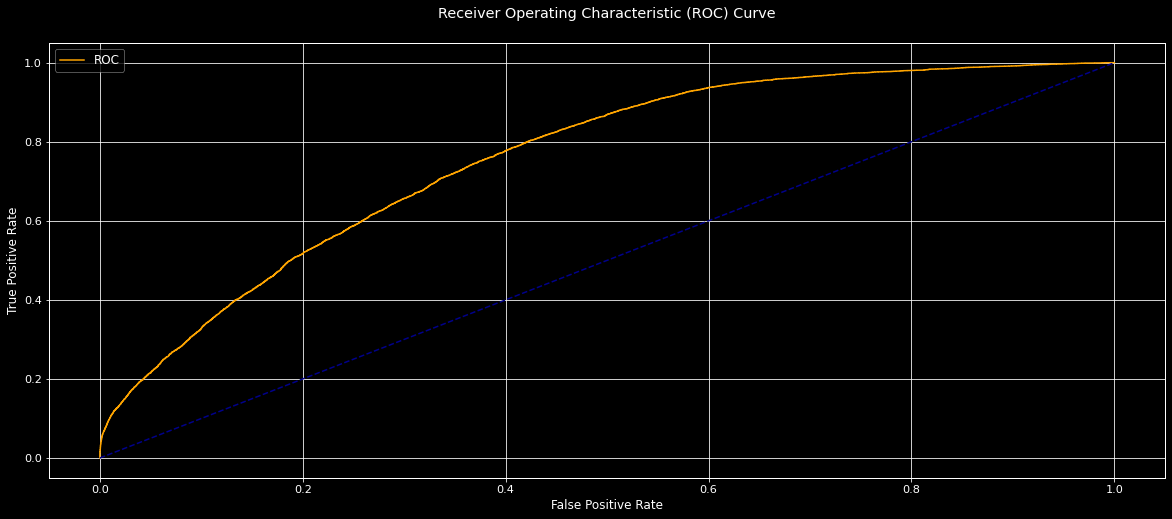

In [89]:
fper, tper, thresholds = roc_curve(Y_test, y_pred_proba_lgbm) 
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Summary of machine learning:

The first model we created gave us the AUC = 0.7441
But then we did some feature engineering and try different models (Light GBM and XGBoost) and tune their parameters and reached the AUC of 0.7609


## Prediction
<br>
After creating the prediction model with AUC of 0.76, we realised that showing up for an appointment is not easy to predict.

All analysis to solve this problem results in AUC around 0.75 which makes a lot of sense because at the end of the day we, humans are unpredictable. A lot of factors may cause a person not showing up for an appointment (for example a sick child or an emergency issue)

### Working with H2O:

We used H2O to find out the best ML Predictive model for our dataset. We found that Light GBM and XGBoost were the most accurate models. This helped us to devote more time on making the existing ML model more efficient. Once we were sure about the model to work on, we coupled feature engineering with hyper-parameter tuning to obtain our desired outcome.
The interface was user friendly and the in-built tutorials helped us to locate various functionalities easily which we wished to perform.

### Thank You